In [9]:
import matplotlib.pyplot as plt

class Fuzzy:
    def __init__(self, a, b, c=None):
        self.a = a
        self.b = b
        self.c = c

    def down(self, x):
        if x <= self.a:
            return 1
        elif x >= self.b:
            return 0
        else:
            return (self.b - x) / (self.b - self.a)

    def up(self, x):
        if x <= self.a:
            return 0
        elif x >= self.b:
            return 1
        else:
            return (x - self.a) / (self.b - self.a)

    def triangle(self, x):
        if self.a <= x <= self.b:
            return (x - self.a) / (self.b - self.a)
        elif self.b < x <= self.c:
            return (self.c - x) / (self.c - self.b)
        return 0

class Demand:
    def __init__(self):
        self.turun = Fuzzy(1000, 3000)
        self.tetap = Fuzzy(2000, 4000)
        self.naik = Fuzzy(3000, 5000)

    def turun_val(self, x): return self.turun.down(x)
    def tetap_val(self, x): return self.tetap.triangle(x)
    def naik_val(self, x): return self.naik.up(x)

class Stock:
    def __init__(self):
        self.sedikit = Fuzzy(0, 200)
        self.sedang = Fuzzy(200, 600)
        self.banyak = Fuzzy(400, 1000)

    def sedikit_val(self, x): return self.sedikit.down(x)
    def sedang_val(self, x): return self.sedang.triangle(x)
    def banyak_val(self, x): return self.banyak.up(x)

class Production:
    def __init__(self):
        self.berkurang = Fuzzy(2000, 5000)
        self.bertambah = Fuzzy(4000, 7000)

    def berkurang_val(self, membership):
        return self.berkurang.a + membership * (self.berkurang.b - self.berkurang.a)

    def bertambah_val(self, membership):
        return self.bertambah.a + membership * (self.bertambah.b - self.bertambah.a)

def fuzzy_inference(demand_value, stock_value):
    demand = Demand()
    stock = Stock()
    production = Production()

    # Hitung derajat keanggotaan fuzzy
    turun = demand.turun_val(demand_value)
    tetap = demand.tetap_val(demand_value)
    naik = demand.naik_val(demand_value)

    sedikit = stock.sedikit_val(stock_value)
    sedang = stock.sedang_val(stock_value)
    banyak = stock.banyak_val(stock_value)

    print("\nDerajat Keanggotaan:")
    print(f"Permintaan: Turun={turun:.2f}, Tetap={tetap:.2f}, Naik={naik:.2f}")
    print(f"Persediaan: Sedikit={sedikit:.2f}, Sedang={sedang:.2f}, Banyak={banyak:.2f}")

    # Aturan fuzzy
    rules = [
        (min(turun, sedikit), "bertambah"),
        (min(turun, sedang), "berkurang"),
        (min(turun, banyak), "berkurang"),
        (min(tetap, sedikit), "bertambah"),
        (min(tetap, sedang), "bertambah"),
        (min(tetap, banyak), "berkurang"),
        (min(naik, sedikit), "bertambah"),
        (min(naik, sedang), "bertambah"),
        (min(naik, banyak), "berkurang")
    ]

    # Defuzzifikasi
    numerator = 0
    denominator = 0

    print("\nDetail Aturan Fuzzy:")
    for strength, action in rules:
        if action == "bertambah":
            crisp_value = production.bertambah_val(strength)
        else:
            crisp_value = production.berkurang_val(strength)

        print(f"Rule: {action.capitalize()}, Strength={strength:.2f}, Output={crisp_value:.2f}")
        numerator += strength * crisp_value
        denominator += strength

    if denominator == 0:
        return 0

    return numerator / denominator

# Input
demand_input = 4000
stock_input = 300

# Hasil
result = fuzzy_inference(demand_input, stock_input)
print(f"\nNilai Produksi yang Disarankan: {result:.2f}")



Derajat Keanggotaan:
Permintaan: Turun=0.00, Tetap=1.00, Naik=0.50
Persediaan: Sedikit=0.00, Sedang=0.25, Banyak=0.00

Detail Aturan Fuzzy:
Rule: Bertambah, Strength=0.00, Output=4000.00
Rule: Berkurang, Strength=0.00, Output=2000.00
Rule: Berkurang, Strength=0.00, Output=2000.00
Rule: Bertambah, Strength=0.00, Output=4000.00
Rule: Bertambah, Strength=0.25, Output=4750.00
Rule: Berkurang, Strength=0.00, Output=2000.00
Rule: Bertambah, Strength=0.00, Output=4000.00
Rule: Bertambah, Strength=0.25, Output=4750.00
Rule: Berkurang, Strength=0.00, Output=2000.00

Nilai Produksi yang Disarankan: 4750.00


Rule 1: α = 0.000, Produksi = bertambah
Rule 2: α = 0.000, Produksi = berkurang
Rule 3: α = 0.000, Produksi = berkurang
Rule 4: α = 0.250, Produksi = bertambah
Rule 5: α = 0.333, Produksi = berkurang
Rule 6: α = 0.000, Produksi = berkurang
Rule 7: α = 0.000, Produksi = bertambah
Rule 8: α = 0.000, Produksi = bertambah
Rule 9: α = 0.000, Produksi = berkurang


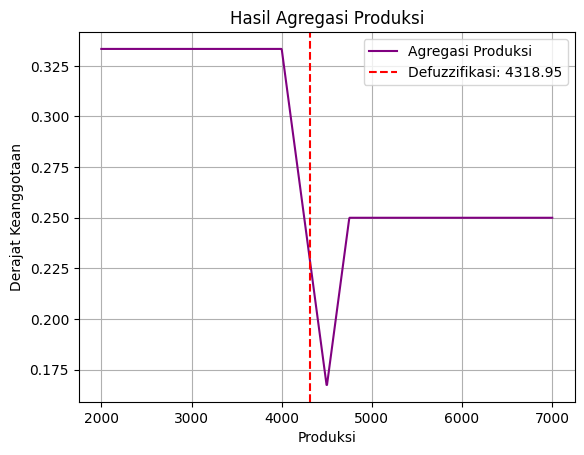


Hasil Defuzzifikasi Produksi: 4318.95


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk Fuzzy Membership
class Fuzzy:
    def __init__(self, a, b, c=None):
        self.a = a
        self.b = b
        self.c = c

    def down(self, x):
        return np.maximum(0, np.minimum((self.b - x) / (self.b - self.a), 1))

    def up(self, x):
        return np.maximum(0, np.minimum((x - self.a) / (self.b - self.a), 1))

    def triangle(self, x):
        return np.maximum(0, np.minimum((x - self.a) / (self.b - self.a), (self.c - x) / (self.c - self.b)))


# Variabel Fuzzy
permintaan_turun = Fuzzy(0, 2000)
permintaan_tetap = Fuzzy(1000, 3000, 5000)
permintaan_naik = Fuzzy(4000, 6000)

persediaan_sedikit = Fuzzy(0, 400)
persediaan_sedang = Fuzzy(200, 500, 800)
persediaan_banyak = Fuzzy(600, 1000)

produksi_berkurang = Fuzzy(2000, 5000)
produksi_bertambah = Fuzzy(4000, 7000)

# Input
permintaan_input = 4000
persediaan_input = 300

# Derajat keanggotaan
μ_turun = permintaan_turun.down(permintaan_input)
μ_tetap = permintaan_tetap.triangle(permintaan_input)
μ_naik = permintaan_naik.up(permintaan_input)

μ_sedikit = persediaan_sedikit.down(persediaan_input)
μ_sedang = persediaan_sedang.triangle(persediaan_input)
μ_banyak = persediaan_banyak.up(persediaan_input)

# Aturan Fuzzy
rules = [
    (min(μ_turun, μ_sedikit), 'bertambah'),
    (min(μ_turun, μ_sedang), 'berkurang'),
    (min(μ_turun, μ_banyak), 'berkurang'),
    (min(μ_tetap, μ_sedikit), 'bertambah'),
    (min(μ_tetap, μ_sedang), 'berkurang'),
    (min(μ_tetap, μ_banyak), 'berkurang'),
    (min(μ_naik, μ_sedikit), 'bertambah'),
    (min(μ_naik, μ_sedang), 'bertambah'),
    (min(μ_naik, μ_banyak), 'berkurang'),
]

# Cetak derajat keanggotaan aturan
for i, (α, produksi) in enumerate(rules, start=1):
    print(f"Rule {i}: α = {α:.3f}, Produksi = {produksi}")

# Agregasi Output
x = np.linspace(2000, 7000, 1000)
μ_produksi = np.zeros_like(x)

for α, produksi in rules:
    if produksi == 'berkurang':
        μ_produksi = np.maximum(μ_produksi, np.minimum(α, produksi_berkurang.down(x)))
    elif produksi == 'bertambah':
        μ_produksi = np.maximum(μ_produksi, np.minimum(α, produksi_bertambah.up(x)))

# Defuzzifikasi (Centroid)
defuzzified_output = np.sum(x * μ_produksi) / np.sum(μ_produksi)

# Grafik Hasil Agregasi
plt.figure()
plt.plot(x, μ_produksi, label='Agregasi Produksi', color='purple')
plt.title("Hasil Agregasi Produksi")
plt.xlabel("Produksi")
plt.ylabel("Derajat Keanggotaan")
plt.axvline(defuzzified_output, color='red', linestyle='--', label=f"Defuzzifikasi: {defuzzified_output:.2f}")
plt.legend()
plt.grid()
plt.show()

print(f"\nHasil Defuzzifikasi Produksi: {defuzzified_output:.2f}")


In [13]:
class FuzzyTsukamoto:
    def __init__(self):
        # Rentang untuk permintaan, persediaan, dan produksi
        self.demand = {"turun": (0, 2000), "tetap": (1000, 3000, 5000), "naik": (4000, 6000)}
        self.stock = {"sedikit": (0, 400), "sedang": (200, 500, 800), "banyak": (600, 1000)}
        self.production = {"berkurang": (2000, 5000), "bertambah": (4000, 7000)}

    # Fungsi linear turun
    def down(self, x, a, b):
        return max(0, min((b - x) / (b - a), 1))

    # Fungsi linear naik
    def up(self, x, a, b):
        return max(0, min((x - a) / (b - a), 1))

    # Fungsi segitiga
    def triangle(self, x, a, b, c):
        return max(0, min((x - a) / (b - a), (c - x) / (c - b)))

    # Defuzzifikasi untuk produksi
    def defuzzify(self, demand_input, stock_input):
        # Hitung derajat keanggotaan permintaan
        turun = self.down(demand_input, *self.demand["turun"])
        tetap = self.triangle(demand_input, *self.demand["tetap"])
        naik = self.up(demand_input, *self.demand["naik"])

        # Hitung derajat keanggotaan persediaan
        sedikit = self.down(stock_input, *self.stock["sedikit"])
        sedang = self.triangle(stock_input, *self.stock["sedang"])
        banyak = self.up(stock_input, *self.stock["banyak"])

        # 9 Aturan fuzzy: MIN untuk α-predicate
        rules = [
            ("turun", "sedikit", "bertambah", min(turun, sedikit)),
            ("turun", "sedang", "berkurang", min(turun, sedang)),
            ("turun", "banyak", "berkurang", min(turun, banyak)),
            ("tetap", "sedikit", "bertambah", min(tetap, sedikit)),
            ("tetap", "sedang", "berkurang", min(tetap, sedang)),
            ("tetap", "banyak", "berkurang", min(tetap, banyak)),
            ("naik", "sedikit", "bertambah", min(naik, sedikit)),
            ("naik", "sedang", "bertambah", min(naik, sedang)),
            ("naik", "banyak", "berkurang", min(naik, banyak)),
        ]

        # Output produksi (z) berdasarkan α-predicate
        def production_output(action, alpha):
            a, b = self.production[action]
            return a + alpha * (b - a)  # Linear output

        # Defuzzifikasi menggunakan Tsukamoto
        numerator = 0
        denominator = 0
        print("Detail Perhitungan Manual:")
        for rule in rules:
            demand_label, stock_label, action, alpha = rule
            z = production_output(action, alpha)
            numerator += alpha * z
            denominator += alpha
            print(f"  Aturan: Jika Permintaan {demand_label} dan Persediaan {stock_label} → Produksi {action}")
            print(f"    - α (Min): {alpha:.2f}")
            print(f"    - Output Produksi (z): {z:.2f}\n")

        if denominator == 0:
            return 0  # Hindari pembagian nol
        return numerator / denominator


# Input manual
demand_input = 4000  # Nilai input permintaan
stock_input = 300    # Nilai input persediaan

# Inisialisasi dan hitung
fuzzy = FuzzyTsukamoto()
output_production = fuzzy.defuzzify(demand_input, stock_input)
print(f"\nOutput Produksi (Defuzzifikasi): {output_production:.2f}")


Detail Perhitungan Manual:
  Aturan: Jika Permintaan turun dan Persediaan sedikit → Produksi bertambah
    - α (Min): 0.00
    - Output Produksi (z): 4000.00

  Aturan: Jika Permintaan turun dan Persediaan sedang → Produksi berkurang
    - α (Min): 0.00
    - Output Produksi (z): 2000.00

  Aturan: Jika Permintaan turun dan Persediaan banyak → Produksi berkurang
    - α (Min): 0.00
    - Output Produksi (z): 2000.00

  Aturan: Jika Permintaan tetap dan Persediaan sedikit → Produksi bertambah
    - α (Min): 0.25
    - Output Produksi (z): 4750.00

  Aturan: Jika Permintaan tetap dan Persediaan sedang → Produksi berkurang
    - α (Min): 0.33
    - Output Produksi (z): 3000.00

  Aturan: Jika Permintaan tetap dan Persediaan banyak → Produksi berkurang
    - α (Min): 0.00
    - Output Produksi (z): 2000.00

  Aturan: Jika Permintaan naik dan Persediaan sedikit → Produksi bertambah
    - α (Min): 0.00
    - Output Produksi (z): 4000.00

  Aturan: Jika Permintaan naik dan Persediaan sedang →